In [1]:
import os
import re
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import ConnectionPatch
%matplotlib inline

In [17]:
cust_seg = pd.read_excel(r'..\input\data.xlsx',sheet_name='cust_seg')
products = pd.read_excel(r'..\input\data.xlsx',sheet_name='product')

In [4]:
cust_seg

,Criteria,Cat,Customers,LTV,rev_label,order_label
0,Population,Interested,66911,3.659256e+09,3.66 B (100.0%),3.66 B (100.0%)\n66911 Customers
1,Population,Not Interested,0,0.000000e+00,0.0 M (0.0%),0.0 M (0.0%)\n0 Customers
2,Population,Pot. Interested,0,0.000000e+00,0.0 M (0.0%),0.0 M (0.0%)\n0 Customers
3,Criteria 1\n College Grad?,Interested,33707,2.011262e+09,2.01 B (55.0%),2.01 B (55.0%)\n33707 Customers
4,Criteria 1\n College Grad?,Not Interested,27533,1.182056e+09,1.18 B (32.3%),1.18 B (32.3%)\n27533 Customers
5,Criteria 1\n College Grad?,Pot. Interested,5671,4.659377e+08,465.94 M (12.7%),465.94 M (12.7%)\n5671 Customers
6,Criteria 2\nWorked 2+ Years?,Interested,32014,1.971721e+09,1.97 B (53.9%),1.97 B (53.9%)\n32014 Customers
7,Criteria 2\nWorked 2+ Years?,Not Interested,29540,1.230219e+09,1.23 B (33.6%),1.23 B (33.6%)\n29540 Customers
8,Criteria 2\nWorked 2+ Years?,Pot. Interested,5357,4.573167e+08,457.32 M (12.5%),457.32 M (12.5%)\n5357 Customers
9,Criteria 3\nIn Hi-tech?,Interested,12896,7.457730e+08,745.77 M (20.4%),745.77 M (20.4%)\n12896 Customers


In [5]:
products

,Cat,System,Customers,LTV,CumRevForPlot,rev_label,fam_label
0,Interested,Product Tier 1,1972,1.895308e+08,1.895308e+08,189.53 M (5.2%),Product Tier 1\n189.53 M (5.2%)\n1972 Customers
1,Interested,Product Tier 2,1192,4.821128e+07,2.377420e+08,48.21 M (1.3%),Product Tier 2\n48.21 M (1.3%)\n1192 Customers
2,Interested,Product Tier 3,0,0.000000e+00,2.377420e+08,0.0 M (0.0%),Product Tier 3\n0.0 M (0.0%)\n0 Customers
3,Not Interested,Product Tier 1,22704,1.616230e+09,1.616230e+09,1.62 B (44.2%),Product Tier 1\n1.62 B (44.2%)\n22704 Customers
4,Not Interested,Product Tier 2,18902,8.466200e+08,2.462850e+09,846.62 M (23.1%),Product Tier 2\n846.62 M (23.1%)\n18902 Customers
5,Not Interested,Product Tier 3,15120,4.033312e+08,2.866181e+09,403.33 M (11.0%),Product Tier 3\n403.33 M (11.0%)\n15120 Customers
6,Pot. Interested,Product Tier 1,2394,3.324097e+08,3.324097e+08,332.41 M (9.1%),Product Tier 1\n332.41 M (9.1%)\n2394 Customers
7,Pot. Interested,Product Tier 2,4165,1.979038e+08,5.303135e+08,197.9 M (5.4%),Product Tier 2\n197.9 M (5.4%)\n4165 Customers
8,Pot. Interested,Product Tier 3,462,2.501873e+07,5.553322e+08,25.02 M (0.7%),Product Tier 3\n25.02 M (0.7%)\n462 Customers


In [6]:
criteria = cust_seg.Criteria.unique().tolist()
y_pos = np.arange(len(criteria))
y_pos[::-1].sort()

## Values
int_cust = cust_seg.loc[cust_seg.Cat=='Interested','LTV'].values
pot = cust_seg.loc[cust_seg.Cat=='Pot. Interested','LTV'].values + int_cust
ni = cust_seg.loc[cust_seg.Cat=='Not Interested','LTV'].values + pot

int_prod = products.loc[(products['Cat']=='Interested'),'CumRevForPlot'].values
pot_prod = products.loc[(products['Cat']=='Pot. Interested'),'CumRevForPlot'].values


## Lables
int_labels =cust_seg.loc[cust_seg['Cat']=='Interested','order_label'].values
pot_labels =cust_seg.loc[cust_seg['Cat']=='Pot. Interested','order_label'].values

sys_int_labels = products.loc[products['Cat']=='Interested','fam_label'].values
sys_pot_labels = products.loc[products['Cat']=='Pot. Interested','fam_label'].values

sys_labels = products.System.unique()

In [8]:
criteria

['Population',
 'Criteria 1\n College Grad?',
 'Criteria 2\nWorked 2+ Years?',
 'Criteria 3\nIn Hi-tech?',
 'Criteria 4\nHave Kid(s)?']

In [9]:
y_pos

array([4, 3, 2, 1, 0])

In [10]:
int_labels

array(['3.66 B (100.0%)\n66911 Customers',
       '2.01 B (55.0%)\n33707 Customers',
       '1.97 B (53.9%)\n32014 Customers',
       '745.77 M (20.4%)\n12896 Customers',
       '237.74 M (6.5%)\n3164 Customers'], dtype=object)

In [11]:
sys_int_labels

array(['Product Tier 1\n189.53 M (5.2%)\n1972 Customers',
       'Product Tier 2\n48.21 M (1.3%)\n1192 Customers',
       'Product Tier 3\n0.0 M (0.0%)\n0 Customers'], dtype=object)

In [12]:
int_prod

array([1.89530754e+08, 2.37742029e+08, 2.37742029e+08])

In [7]:
rcParams['font.family'] = 'calibri'

FIG_SIZE=(22,10)
BAR_HEIGHT=0.8
LAB_OFFSET = int_cust[1]/50
LAB_SIZE = 20
LINE_WIDTH = 1.8
COLOR = '#A9A9A9'
OUT_PATH = r'../output/pic.png'

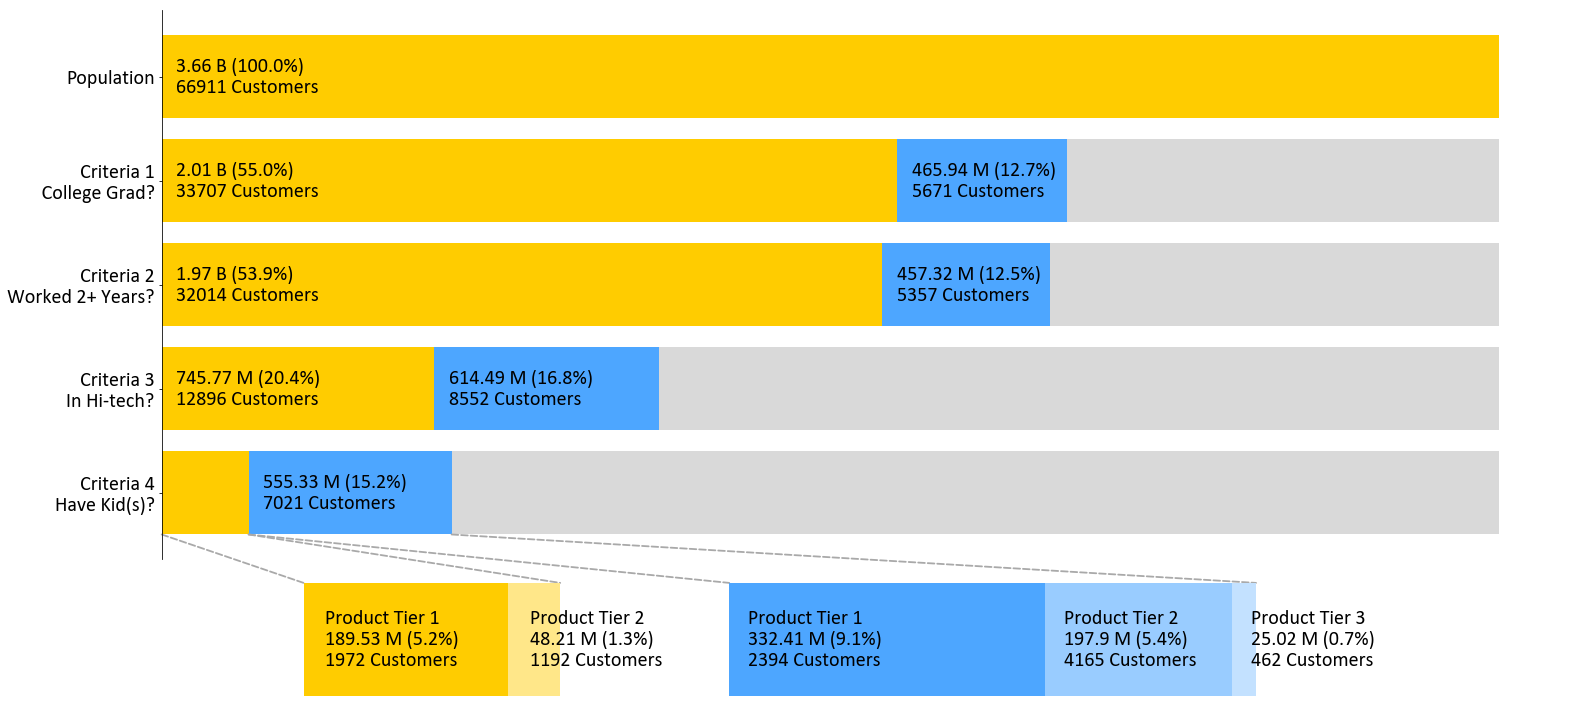

In [56]:
fig = plt.figure(figsize=FIG_SIZE)
grid = plt.GridSpec(5,10)


#######################################################
## Draw the bars
#######################################################

## Chart 1
ax1 = plt.subplot(grid[0:4,0:])
ax1.tick_params(labelsize=20)


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.axes.get_xaxis().set_visible(False)

ax1.barh(y_pos, ni,color='#d9d9d9',align='center',height=BAR_HEIGHT)
ax1.barh(y_pos, pot,color='#4da6ff',align='center',height=BAR_HEIGHT)
ax1.barh(y_pos, int_cust,color='#FFCC00',align='center',height=BAR_HEIGHT)

ax1.set_yticks(y_pos)
ax1.set_yticklabels(criteria)
ax1.set_xlabel('Distance')


## Chart 2
ax2=plt.subplot(grid[4,1:3], frameon=False)
ax2.barh(0,int_prod[2],color='#FFB3B3',height=BAR_HEIGHT)
ax2.barh(0,int_prod[1],color='#FFE789',height=BAR_HEIGHT)
ax2.barh(0,int_prod[0],color='#FFCC00',height=BAR_HEIGHT)

ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

## Chart 3
ax3=plt.subplot(grid[4,4:8], frameon=False)
ax3.barh(0,pot_prod[2],color='#C3E1FF')
ax3.barh(0,pot_prod[1],color='#99ccff')
ax3.barh(0,pot_prod[0],color='#4da6ff')

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)


#######################################################
## Add Labels
#######################################################

## Interested
for i,label in enumerate(int_labels):
    if i!=len(int_labels)-1:
        ax1.text(LAB_OFFSET,y_pos[i],label,size=LAB_SIZE,verticalalignment='center')

## Not Interested
for i,label in enumerate(pot_labels):
    if re.match('0.0 M',label) is None:
        ax1.text(LAB_OFFSET+int_cust[i],y_pos[i],label,size=LAB_SIZE,verticalalignment='center')
        
## Remaining Interested Sys
ax2.text(LAB_OFFSET/2,0,sys_int_labels[0], size=LAB_SIZE, verticalalignment='center')
ax2.text(LAB_OFFSET/2+int_prod[0],0,sys_int_labels[1], size=LAB_SIZE, verticalalignment='center')

## Remaining Pot. Interested Sys
ax3.text(LAB_OFFSET/2,0,sys_pot_labels[0], size=LAB_SIZE, verticalalignment='center')
ax3.text(LAB_OFFSET/2+pot_prod[0],0,sys_pot_labels[1], size=LAB_SIZE, verticalalignment='center')
ax3.text(LAB_OFFSET/2+pot_prod[1],0,sys_pot_labels[2], size=LAB_SIZE, verticalalignment='center')

#######################################################
## Add connection lines
#######################################################

## Interested
a_o_x1=0
a_o_x2=int_cust[-1]
a_o_y= 0 - BAR_HEIGHT/2
# ax1.plot(a_o_x1,a_o_y,'bo')
# ax1.plot(a_o_x2,a_o_y,'bo')

a_d_x1=0
a_d_x2=int_prod[1]
a_d_y=BAR_HEIGHT/2
# ax2.plot(a_d_x1,a_d_y,'bo')
# ax2.plot(a_d_x2,a_d_y,'bo')

con = ConnectionPatch(xyA=(a_o_x1,a_o_y), xyB=(a_d_x1,a_d_y),
                      coordsA="data", coordsB="data", axesA=ax1, axesB=ax2,color=COLOR)
con.set_linewidth(LINE_WIDTH)
con.set_linestyle('--')
ax1.add_artist(con)

con = ConnectionPatch(xyA=(a_o_x2,a_o_y), xyB=(a_d_x2,a_d_y),
                      coordsA="data", coordsB="data", axesA=ax1, axesB=ax2,color=COLOR)
con.set_linewidth(LINE_WIDTH)
con.set_linestyle('--')
ax1.add_artist(con)

## Pot. Interested
p_o_x1=a_o_x2
p_o_x2=pot[-1]


p_d_x1=a_d_x1
p_d_x2=pot_prod[2]

con = ConnectionPatch(xyA=(p_o_x1,a_o_y), xyB=(p_d_x1,a_d_y),
                      coordsA="data", coordsB="data", axesA=ax1, axesB=ax3,color=COLOR)
con.set_linewidth(LINE_WIDTH)
con.set_linestyle('--')
ax1.add_artist(con)

con = ConnectionPatch(xyA=(p_o_x2,a_o_y), xyB=(p_d_x2,a_d_y),
                      coordsA="data", coordsB="data", axesA=ax1, axesB=ax3,color=COLOR)
con.set_linewidth(LINE_WIDTH)
con.set_linestyle('--')
ax1.add_artist(con)

plt.tight_layout()
plt.savefig(OUT_PATH)